<a href="https://colab.research.google.com/github/ym23308/Data-Science-Portfolio/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#loading data set

In [5]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
#exploreing data

In [7]:
print(df.head())
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
#Data cleaning

In [8]:
df=df.drop(['Name','Ticket','Cabin'], axis=1)

In [9]:
df['Age'].fillna(df['Age'].median() , inplace=True)

/tmp/ipython-input-798700213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median() , inplace=True)


In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
#Feature engineering

In [11]:
df ['Sex']= df['Sex'].map({'male':0, 'female':1})

In [12]:
df=pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
#Split data (train/test)

In [16]:
x=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2 , random_state=42)

In [ ]:
#Modeling

In [18]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
#evaluate (accuracy score)

In [20]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
#Survival count plot

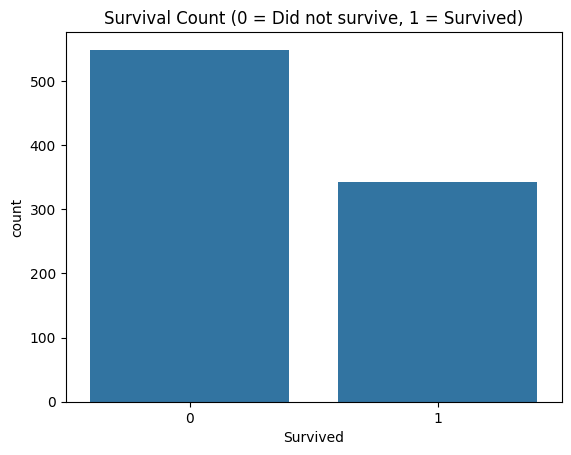

In [21]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Did not survive, 1 = Survived)')
plt.show()


In [ ]:
#Survival by gender

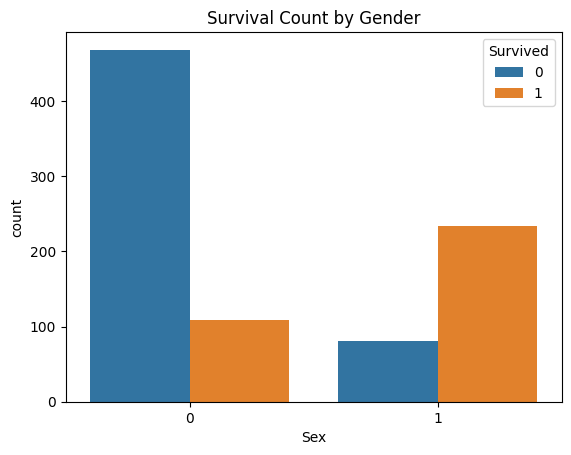

In [22]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()
